## An√°lise Explorat√≥ria de Dados dos Vingadores: Padr√µes de Mortalidade e Ressurrei√ß√£o

download.jpg

## Descri√ß√£o do Projeto:

Este projeto, inspirado no e-book de projetos da Universidade dos Dados, tem como objetivo explorar e responder perguntas sobre a trajet√≥ria dos membros dos Vingadores ao longo dos anos. Atrav√©s de uma an√°lise detalhada, investiguei a rela√ß√£o entre n√∫mero de apari√ß√µes, status dentro da equipe e eventos de morte e ressurrei√ß√£o.

Busquei responder quest√µes como: quais personagens mais morrem? H√° padr√µes de ressurrei√ß√£o? Existe uma rela√ß√£o entre tempo de equipe e taxa de mortalidade?

Utilizando t√©cnicas de an√°lise de dados, este estudo revela insights sobre os altos e baixos da vida heroica no universo Marvel. üöÄüî•

## 0. Importa√ß√µes

### 0.1 Bibliotecas

In [1]:
# Manipula√ß√£o de dados
import pandas as pd
import numpy as np

# Visualiza√ß√£o de dados
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# An√°lise estat√≠stica
from scipy import stats
import statsmodels.api as sm

import warnings

### 0.2 Configura√ß√µes

In [2]:
warnings.filterwarnings('ignore')

### Pandas Settings
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

### Configura√ß√£o paleta de cores - Vingadores
avengers_palette = ['#b11313', '#0c1e8b', '#044B20', '#F2B705', '#690f67', '#ff6d00']
px.defaults.color_discrete_sequence = avengers_palette

### 0.3 Dados

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/avengers/avengers.csv", encoding="ISO-8859-1")

## 1. Descri√ß√£o dos dados

In [4]:
df.head()

URL  \
0      http://marvel.wikia.com/Henry_Pym_(Earth-616)   
1  http://marvel.wikia.com/Janet_van_Dyne_(Earth-...   
2  http://marvel.wikia.com/Anthony_Stark_(Earth-616)   
3  http://marvel.wikia.com/Robert_Bruce_Banner_(E...   
4   http://marvel.wikia.com/Thor_Odinson_(Earth-616)   

                    Name/Alias  Appearances Current?  Gender  \
0    Henry Jonathan "Hank" Pym         1269      YES    MALE   
1               Janet van Dyne         1165      YES  FEMALE   
2  Anthony Edward "Tony" Stark         3068      YES    MALE   
3          Robert Bruce Banner         2089      YES    MALE   
4                 Thor Odinson         2402      YES    MALE   

  Probationary Introl Full/Reserve Avengers Intro  Year  Years since joining  \
0                 NaN                      Sep-63  1963                   52   
1                 NaN                      Sep-63  1963                   52   
2                 NaN                      Sep-63  1963                   52   
3                 NaN                      Sep-63  1963                   52   
4                 NaN                      Sep-63  1963                   52   

  Honorary Death1 Return1 Death2 Return2 Death3 Return3 Death4 Return4 Death5  \
0     Full    YES      NO    NaN     NaN    NaN     NaN    NaN     NaN    NaN   
1     Full    YES     YES    NaN     NaN    NaN     NaN    NaN     NaN    NaN   
2     Full    YES     YES    NaN     NaN    NaN     NaN    NaN     NaN    NaN   
3     Full    YES     YES    NaN     NaN    NaN     NaN    NaN     NaN    NaN   
4     Full    YES     YES    YES      NO    NaN     NaN    NaN     NaN    NaN   

  Return5                                              Notes  
0     NaN  Merged with Ultron in Rage of Ultron Vol. 1. A...  
1     NaN  Dies in Secret Invasion V1:I8. Actually was se...  
2     NaN  Death: "Later while under the influence of Imm...  
3     NaN  Dies in Ghosts of the Future arc. However "he ...  
4     NaN  Dies in Fear Itself brought back because that'...

### 1.1 Dimens√£o dos dados

In [5]:
df.shape

(173, 21)

### 1.2 Colunas

| Nome da Coluna                  | Descri√ß√£o                                                                                             |
|--------------------------------|-------------------------------------------------------------------------------------------------------|
| URL                            | URL do personagem nos quadrinhos, conforme listado na Marvel Wikia.                                  |
| Name/Alias                     | Nome completo ou codinome do personagem.                                                              |
| Appearances                    | N√∫mero de edi√ß√µes em que o personagem apareceu at√© 30 de abril de 2015.                              |
| Current?                       | Indica se o personagem est√° atualmente ativo em alguma equipe afiliada aos Vingadores.               |
| Gender                         | G√™nero registrado do personagem.                                                                     |
| Probationary                   | Data em que o personagem recebeu status provis√≥rio como membro dos Vingadores.                       |
| Full/Reserve                   | M√™s e ano em que o personagem foi introduzido como membro titular ou reserva dos Vingadores.         |
| Year                           | Ano em que o personagem foi introduzido como membro titular ou reserva dos Vingadores.               |
| Years since joining            | Quantidade de anos desde que o personagem entrou para os Vingadores (2015 - ano de entrada).         |
| Honorary                       | Status honor√°rio do personagem (ex: "Honor√°rio", "Academia" ou "Titular").                          |
| Death1                         | Indica se o personagem morreu pela primeira vez.                                                     |
| Return1                        | Indica se o personagem retornou da sua primeira morte.                                               |
| Death2                         | Indica se o personagem morreu uma segunda vez ap√≥s retornar.                                         |
| Return2                        | Indica se o personagem retornou da sua segunda morte.                                                |
| Death3                         | Indica se o personagem morreu uma terceira vez ap√≥s retornar.                                        |
| Return3                        | Indica se o personagem retornou da sua terceira morte.                                               |
| Death4                         | Indica se o personagem morreu uma quarta vez ap√≥s retornar.                                          |
| Return4                        | Indica se o personagem retornou da sua quarta morte.                                                 |
| Death5                         | Indica se o personagem morreu uma quinta vez ap√≥s retornar.                                          |
| Return5                        | Indica se o personagem retornou da sua quinta morte.                                                 |
| Notes                          | Notas descritivas sobre mortes e ressurrei√ß√µes do personagem.                                        |

### 1.3 Tipos dos dados

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   URL                          173 non-null    object
 1   Name/Alias                   163 non-null    object
 2   Appearances                  173 non-null    int64 
 3   Current?                     173 non-null    object
 4   Gender                       173 non-null    object
 5   Probationary Introl          15 non-null     object
 6   Full/Reserve Avengers Intro  159 non-null    object
 7   Year                         173 non-null    int64 
 8   Years since joining          173 non-null    int64 
 9   Honorary                     173 non-null    object
 10  Death1                       173 non-null    object
 11  Return1                      69 non-null     object
 12  Death2                       17 non-null     object
 13  Return2                      16 non

## 2. Pr√©-processamento de dados

### 2.1 Renomeando o nome das colunas

In [7]:
df.columns = [
    'url', 'name_alias', 'appearances', 'current', 'gender',
    'probationary_intro', 'full_reserve_intro', 'year', 'years_since_joining',
    'honorary', 'death1', 'return1', 'death2', 'return2',
    'death3', 'return3', 'death4', 'return4', 'death5', 'return5',
    'notes'
]

### 2.2 Verificando e tratando valores nulos

In [8]:
# Criando um dicion√°rio para armazenar as contagens de valores nulos e porcentagens
null_info = {'Coluna': [], 'Valores Nulos': [], '% de Nulos': []}

# Iterando sobre as colunas do DataFrame
for col in df.columns:
    null_count = df[col].isna().sum()
    null_percentage = (null_count / len(df)) * 100

    # Adicionando os dados ao dicion√°rio
    null_info['Coluna'].append(col)
    null_info['Valores Nulos'].append(null_count)
    null_info['% de Nulos'].append(null_percentage)

# Criando um DataFrame com os resultados
null_values = pd.DataFrame(null_info)

# Ordenando os valores nulos em ordem decrescente
null_values = null_values.sort_values(by='Valores Nulos', ascending=False)

# Exibindo os valores nulos
print(null_values)

                 Coluna  Valores Nulos  % de Nulos
19              return5            172      99.422
18               death5            172      99.422
17              return4            172      99.422
16               death4            172      99.422
15              return3            171      98.844
14               death3            171      98.844
5    probationary_intro            158      91.329
13              return2            157      90.751
12               death2            156      90.173
11              return1            104      60.116
20                notes             98      56.647
6    full_reserve_intro             14       8.092
1            name_alias             10       5.780
0                   url              0       0.000
9              honorary              0       0.000
8   years_since_joining              0       0.000
7                  year              0       0.000
4                gender              0       0.000
3               current        

In [9]:
# Preencher valores faltantes da coluna return1 com "No"
df['return1'] = df['return1'].fillna('No')

In [10]:
# Converter os valores das colunas death1 e return1 para num√©ricos (Yes ‚Üí 1, No ‚Üí 0)
df['death1'] = df['death1'].map({'YES': 1, 'NO': 0})
df['return1'] = df['return1'].map({'YES': 1, 'NO': 0})

In [11]:
df_clean = df.dropna(subset=['name_alias'])

In [12]:
# Selecionando atributos categ√≥ricos
cat_attributes = df.select_dtypes(include=['object'])

# Contagem de valores √∫nicos
unique_counts = cat_attributes.nunique()

# Exibindo os resultados
print(unique_counts)

url                   173
name_alias            162
current                 2
gender                  2
probationary_intro     12
full_reserve_intro     93
honorary                4
death2                  2
return2                 2
death3                  1
return3                 2
death4                  1
return4                 1
death5                  1
return5                 1
notes                  71
dtype: int64


## 3. An√°lise Explorat√≥ria de Dados

### 3.1 Quantos her√≥is temos nesse conjunto de dados?

In [13]:
total_herois = df.shape[0]
print(f"Total de her√≥is: {total_herois}")

Total de her√≥is: 173


### 3.2 Qual a distribui√ß√£o de g√™nero dos personagens?

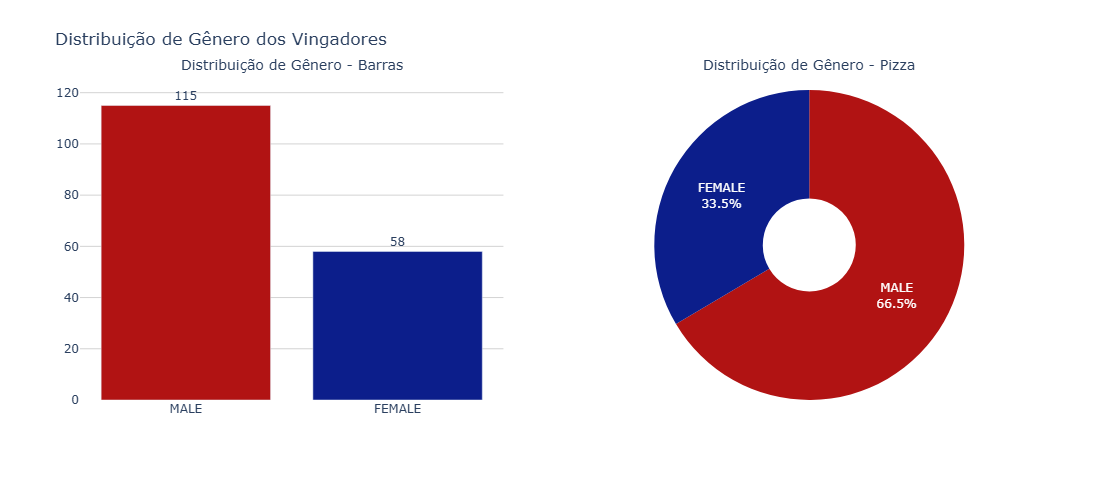

In [16]:
# Contagem de personagens por g√™nero
gender_count = df['gender'].value_counts().reset_index()
gender_count.columns = ['Gender', 'Count']

# Paleta de cores
colors = avengers_palette

# Subplots com t√≠tulos separados
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Distribui√ß√£o de G√™nero - Barras", "Distribui√ß√£o de G√™nero - Pizza"),
    specs=[[{"type": "bar"}, {"type": "pie"}]]
)

# Gr√°fico de Barras
fig.add_trace(
    go.Bar(
        x=gender_count['Gender'],
        y=gender_count['Count'],
        text=gender_count['Count'],
        textposition='outside',
        marker_color=colors,
        showlegend=False
    ),
    row=1, col=1
)

# Gr√°fico de Pizza
fig.add_trace(
    go.Pie(
        labels=gender_count['Gender'],
        values=gender_count['Count'],
        marker=dict(colors=colors),
        textinfo='label+percent',
        showlegend=False,
        hole=0.3
    ),
    row=1, col=2
)

# Layout com espa√ßo extra entre os t√≠tulos e os gr√°ficos
fig.update_layout(
    height=480,
    width=850,
    title_text="Distribui√ß√£o de G√™nero dos Vingadores",
    plot_bgcolor='white',
    paper_bgcolor='white',
    margin=dict(t=90),  # top margin aumenta dist√¢ncia do t√≠tulo principal
)

# Espa√ßamento dos t√≠tulos dos subplots
fig.update_annotations(font_size=14, yshift=15)

# Grade e ajustes visuais do eixo
fig.update_yaxes(
    showgrid=True,
    gridcolor='lightgrey',
    zeroline=False,
    row=1, col=1,
    title_standoff=20
)

fig.update_xaxes(
    showgrid=False,
    row=1, col=1,
    title_standoff=20
)

fig.show()

# Salvando o gr√°fico como uma imagem PNG
fig.write_image('C:/Users/Rubeus/Documents/avengers/images/fig_1.png', width=1200, height=700, scale=3)

### 3.3 Qual √© a m√©dia de apari√ß√µes dos personagens?

In [15]:
# M√©dia de apari√ß√µes
average_appearances = df['appearances'].mean()
print(f'M√©dia de apari√ß√µes: {average_appearances:.2f}')

M√©dia de apari√ß√µes: 414.05


In [17]:
fig = px.histogram(
    df,
    x='appearances',
    nbins=30,
    title='Distribui√ß√£o de Apari√ß√µes dos Vingadores',
    color_discrete_sequence=['#e40000'],
    opacity=0.85
)

# Atualiza√ß√µes de layout
fig.update_layout(
    xaxis_title='N√∫mero de Apari√ß√µes',
    yaxis_title='Quantidade de Personagens',
    plot_bgcolor='white',
    paper_bgcolor='white',
    width=700,
    height=450,
    bargap=0.05,  # Espa√ßo entre as barras
    title_x=0.5,  # Centraliza o t√≠tulo
    font=dict(size=12),
    xaxis=dict(
        showgrid=False
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='lightgrey'
    )
)

# Adiciona contornos nas barras
fig.update_traces(marker_line_color='black', marker_line_width=0.8)

fig.show()


# Salvando o gr√°fico como uma imagem PNG
fig.write_image('C:/Users/Rubeus/Documents/tcc/images/fig_2.png', width=1200, height=700, scale=3)

In [18]:
fig = px.box(
    df,
    y='appearances',
    points='outliers',
    color_discrete_sequence=avengers_palette,
    title='Boxplot de Apari√ß√µes dos Personagens'
)

# Ajustes de layout
fig.update_layout(
    yaxis_title='N√∫mero de Apari√ß√µes',
    xaxis_showticklabels=False,
    plot_bgcolor='white',
    paper_bgcolor='white',
    height=450,
    width=700,
    margin=dict(t=80)  # dist√¢ncia do t√≠tulo para o gr√°fico
)

fig.show()


# Salvando o gr√°fico como uma imagem PNG
fig.write_image('C:/Users/Rubeus/Documents/tcc/images/fig_3.png', width=1200, height=700, scale=3)

- A maioria dos personagens aparece em poucos quadrinhos ou hist√≥rias, enquanto um pequeno grupo de personagens muito populares aparece em centenas ou at√© milhares de vezes.

- Como 75% dos personagens t√™m menos de 500 apari√ß√µes, fica claro que h√° uma grande concentra√ß√£o de visibilidade em poucos personagens.

### 3.4 Qual a distribui√ß√£o de apari√ß√µes por g√™nero?

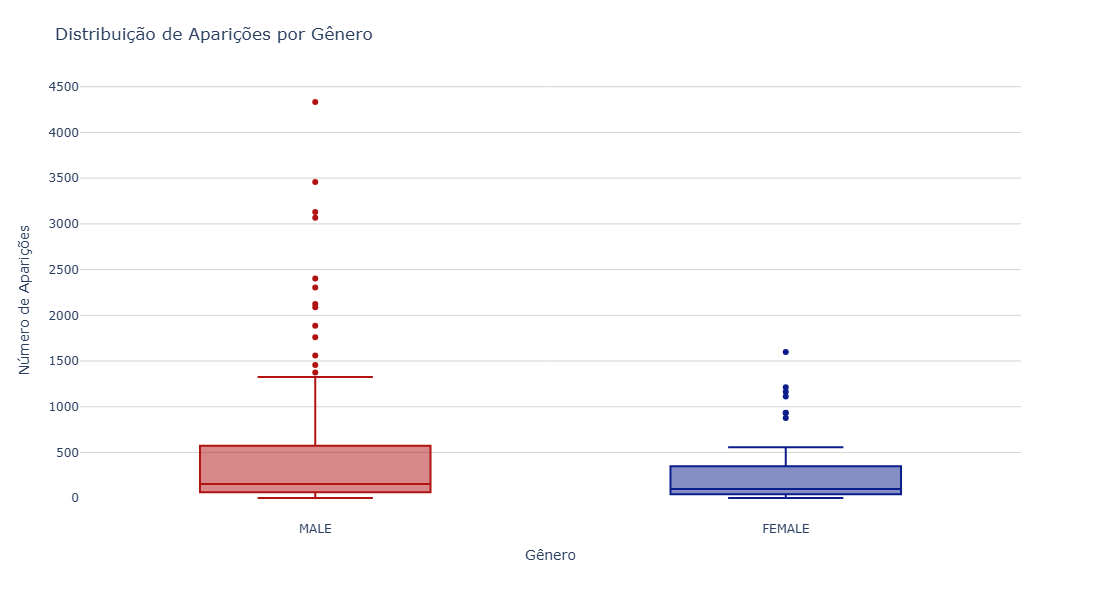

In [19]:
# Remover linhas com dados nulos nas colunas usadas
df_gender_appearances = df[['gender', 'appearances']].dropna()

fig = px.box(
    df_gender_appearances,
    x='gender',
    y='appearances',
    color='gender',
    title='Distribui√ß√£o de Apari√ß√µes por G√™nero',
    color_discrete_sequence=avengers_palette,
    points='outliers'
)

# Layout com grid no eixo Y
fig.update_layout(
    xaxis_title='G√™nero',
    yaxis_title='N√∫mero de Apari√ß√µes',
    plot_bgcolor='white',
    paper_bgcolor='white',
    height=600,
    width=800,
    margin=dict(t=80),
    showlegend=False,
    yaxis=dict(
        showgrid=True,
        gridcolor='lightgrey'
    ),
    xaxis=dict(
        showgrid=False
    )
)

fig.show()


# Salvando o gr√°fico como uma imagem PNG
fig.write_image('C:/Users/Rubeus/Documents/tcc/images/fig_4.png', width=1200, height=700, scale=3)

- Personagens masculinos t√™m, em m√©dia, 490 apari√ß√µes, quase o dobro da m√©dia de personagens femininos, que √© de 263. Isso indica uma **maior representatividade e recorr√™ncia dos personagens homens nas HQs e conte√∫dos analisados.**

- O n√∫mero m√°ximo de apari√ß√µes para homens √© de 4333, contra 1598 para mulheres. Isso mostra que **os personagens mais recorrentes e importantes na narrativa s√£o, predominantemente, homens.**

- Os personagens masculinos n√£o s√≥ aparecem mais frequentemente nas hist√≥rias, como tamb√©m apresentam uma maior varia√ß√£o no n√∫mero de apari√ß√µes, refletindo uma predomin√¢ncia masculina nos pap√©is de maior destaque. J√° os personagens femininos tendem a ter menos apari√ß√µes e menos dispers√£o, o que pode indicar pap√©is mais secund√°rios ou menos recorrentes nas narrativas da franquia.

### 3.5 Quais s√£o os personagens que mais aparecem?

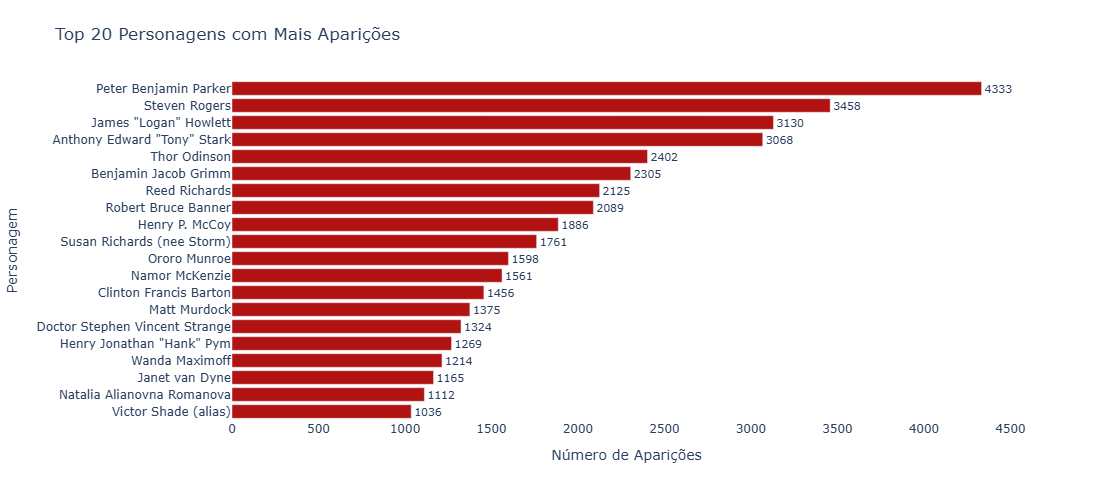

In [20]:
# Top 20 personagens com mais apari√ß√µes
top_characters = df[['name_alias', 'appearances']].sort_values(by='appearances', ascending=False).head(20)

# Gr√°fico de barras horizontal
fig = px.bar(
    top_characters,
    x='appearances',
    y='name_alias',
    orientation='h',
    text='appearances',
    title='Top 20 Personagens com Mais Apari√ß√µes',
    color_discrete_sequence=[avengers_palette[0]]
)

# Layout visual
fig.update_layout(
    xaxis_title='N√∫mero de Apari√ß√µes',
    yaxis_title='Personagem',
    plot_bgcolor='white',
    paper_bgcolor='white',
    height=500,
    width=950,
    margin=dict(t=80),
    yaxis=dict(autorange="reversed")  # Deixa o personagem com mais apari√ß√µes no topo
)

fig.update_traces(textposition='outside')
fig.show()


# Salvando o gr√°fico como uma imagem PNG
fig.write_image('C:/Users/Rubeus/Documents/tcc/images/fig_5.png', width=1200, height=700, scale=3)

A an√°lise das apari√ß√µes mostra que os personagens mais presentes nas edi√ß√µes da Marvel s√£o figuras centrais do universo dos Vingadores. O top 5 √© composto por her√≥is extremamente populares e com papel recorrente nas hist√≥rias:

*   Peter Parker (Homem-Aranha)
*   Steven Rogers (Capit√£o Am√©rica)
*   James Logan Howlett (Wolverine)
*   Tony Stark (Homem de Ferro)
*   Thor

Al√©m disso, s√£o her√≥is que protagonizaram n√£o s√≥ hist√≥rias em grupo, mas tamb√©m s√©ries solo, o que naturalmente contribui para o n√∫mero elevado de apari√ß√µes. O destaque de Peter Parker no topo, por exemplo, mostra o quanto o Homem-Aranha transcende diferentes equipes e linhas narrativas da Marvel.

### 3.5 Como a ades√£o dos her√≥is ao grupo dos Avengers ao longo dos anos se modificou?

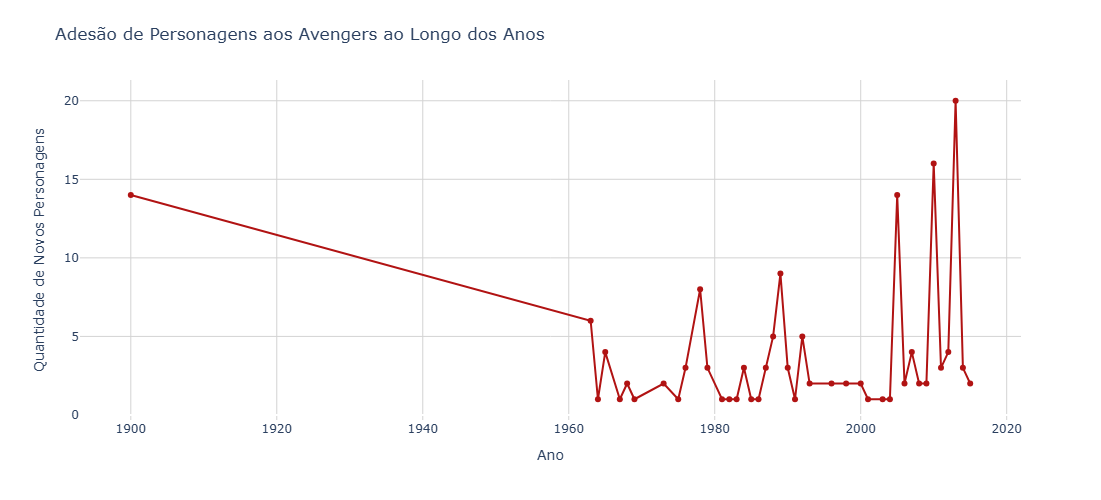

In [21]:
# Contar o n√∫mero de personagens por ano com base na coluna name_alias
heroes_per_year = df.groupby('year')['name_alias'].count().reset_index()
heroes_per_year.columns = ['year', 'num_characters']

fig = px.line(
    heroes_per_year,
    x='year',
    y='num_characters',
    markers=True,
    title='Ades√£o de Personagens aos Avengers ao Longo dos Anos',
    labels={'year': 'Ano', 'num_characters': 'Quantidade de Novos Personagens'},
    color_discrete_sequence=[avengers_palette[0]]
)

fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    margin=dict(t=80),
    height=500,
    width=800
)

fig.show()


# Salvando o gr√°fico como uma imagem PNG
fig.write_image('C:/Users/Rubeus/Documents/tcc/images/fig_6.png', width=1200, height=700, scale=3)

- A partir dos anos 2000, especialmente entre 2010 e 2015, houve um aumento expressivo na inclus√£o de novos personagens. Esse movimento pode estar relacionado √† expans√£o do universo Marvel nos cinemas, com o crescimento do MCU (Marvel Cinematic Universe).

- A ades√£o de novos personagens aos Vingadores apresenta um crescimento significativo a partir dos anos 2000, com picos mais acentuados nos anos que coincidem com a populariza√ß√£o dos filmes da Marvel. A distribui√ß√£o desigual ao longo do tempo mostra como o grupo evoluiu: de uma equipe cl√°ssica e enxuta para um universo extenso e diversificado de her√≥is.

### 3.5.1 Investiga√ß√£o de inconsist√™ncias nos dados

Apesar da Marvel ter sido fundada em 1939, encontramos 14 personagens com o ano de ades√£o em 1900, o que indica uma poss√≠vel inconsist√™ncia nos dados. Esse valor pode ter sido usado como placeholder para anos desconhecidos ou inserido incorretamente.

Por isso, optei por remover essas entradas para garantir uma an√°lise temporal mais confi√°vel.

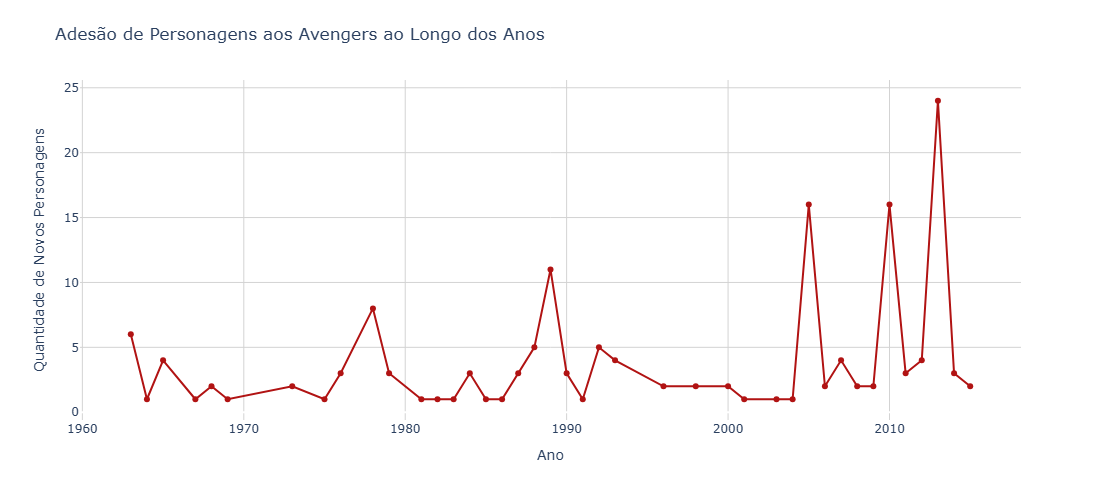

In [22]:
# Filtrar os dados, excluindo registros com ano 1900
df_valid_years = df[df['year'] > 1939] 

# Contar personagens por ano (dados corrigidos)
heroes_per_year_clean = df_valid_years.groupby('year').size().reset_index(name='num_characters')

# Gr√°fico de linha com anos v√°lidos
fig = px.line(
    heroes_per_year_clean,
    x='year',
    y='num_characters',
    markers=True,
    title='Ades√£o de Personagens aos Avengers ao Longo dos Anos',
    labels={'year': 'Ano', 'num_characters': 'Quantidade de Novos Personagens'},
    color_discrete_sequence=[avengers_palette[0]]
)

fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    margin=dict(t=80),
    height=500,
    width=800
)

fig.show()

# Salvando o gr√°fico como uma imagem PNG
fig.write_image('C:/Users/Rubeus/Documents/tcc/images/fig_61.png', width=1200, height=700, scale=3)

### 3.6 Evolu√ß√£o da Distribui√ß√£o de G√™nero por D√©cada

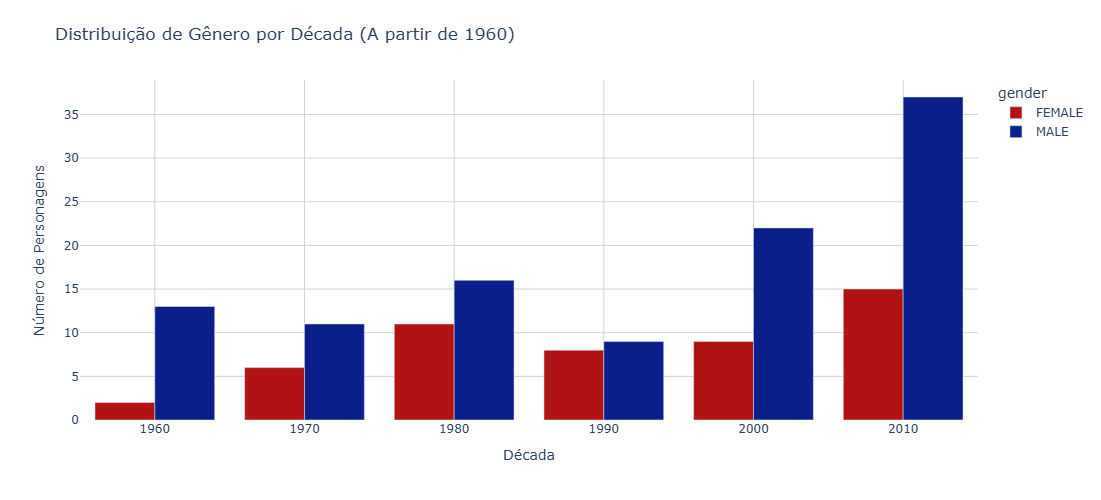

In [23]:
# Criar coluna de d√©cada
df['decade'] = (df['year'] // 10) * 10

# Filtrar apenas d√©cadas a partir de 1960 e remover nulos
df_gender_decade = df[['gender', 'decade']].dropna()
df_gender_decade = df_gender_decade[df_gender_decade['decade'] >= 1960]

# Contar personagens por d√©cada e g√™nero
gender_by_decade = df_gender_decade.groupby(['decade', 'gender']).size().reset_index(name='count')

# Gr√°fico de barras
fig = px.bar(
    gender_by_decade,
    x='decade',
    y='count',
    color='gender',
    barmode='group',
    title='Distribui√ß√£o de G√™nero por D√©cada (A partir de 1960)',
    labels={'decade': 'D√©cada', 'count': 'N√∫mero de Personagens'},
    color_discrete_sequence=avengers_palette
)

# Layout visual
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    margin=dict(t=80),
    height=500,
    width=800
)

fig.show()


# Salvando o gr√°fico como uma imagem PNG
fig.write_image('C:/Users/Rubeus/Documents/tcc/images/fig_7.png', width=1200, height=700, scale=3)

- Ao longo do tempo, o n√∫mero total de personagens cresceu consideravelmente. Apesar disso, a discrep√¢ncia entre os g√™neros permanece, embora com sinais de redu√ß√£o gradual.
- Nos anos 1960, havia mais de 6 homens para cada mulher. J√° em 2010, essa rela√ß√£o caiu para cerca de 2,5 homens por mulher, mostrando um avan√ßo na inclus√£o de personagens femininas.
- Apesar desse progresso, o n√∫mero de personagens masculinos segue crescendo em ritmo mais acelerado, mantendo-os como maioria. A d√©cada de 2010 representa um marco, com o maior n√∫mero de personagens femininos registrados at√© ent√£o, o que pode refletir um movimento mais recente por maior representatividade de g√™nero nos quadrinhos.

### 3.7 Existe alguma diferen√ßa na propor√ß√£o de personagens honor√°rios para cada um dos g√™neros?

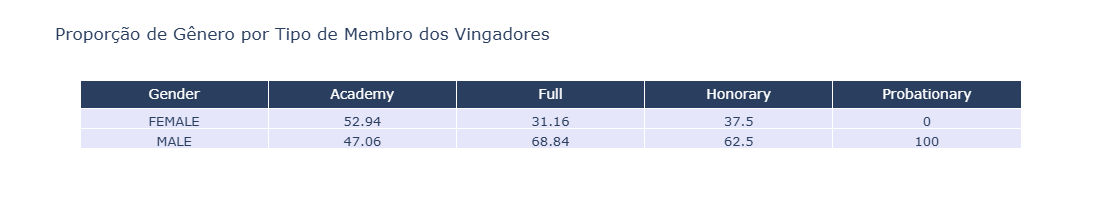

In [24]:
# Preparar os dados (frequ√™ncia relativa por coluna Honorary)
df_honorary = df[['gender', 'honorary']].dropna()
freq_prop = pd.crosstab(df_honorary['gender'], df_honorary['honorary'], normalize='columns') * 100
freq_prop = freq_prop.round(2)  # Arredonda para duas casas decimais

# Reorganizar a ordem das colunas se necess√°rio
colunas_ordenadas = ['Academy', 'Full', 'Honorary', 'Probationary']
freq_prop = freq_prop.reindex(columns=colunas_ordenadas)

# Criar tabela estilizada com Plotly
header = ['Gender'] + list(freq_prop.columns)
cells = [[gender] + list(freq_prop.loc[gender]) for gender in freq_prop.index]

fig = go.Figure(data=[
    go.Table(
        header=dict(
            values=header,
            fill_color='#2A3F5F',
            font=dict(color='white', size=14),
            align='center'
        ),
        cells=dict(
            values=list(zip(*cells)),
            fill_color='lavender',
            align='center',
            font=dict(size=13)
        )
    )
])

fig.update_layout(
    title='Propor√ß√£o de G√™nero por Tipo de Membro dos Vingadores',
    margin=dict(t=80, b=30),
    height=200
)

fig.show()


# Salvando o gr√°fico como uma imagem PNG
fig.write_image('C:/Users/Rubeus/Documents/tcc/images/fig_8.png', width=1200, height=700, scale=3)

- Apesar da predomin√¢ncia masculina entre os membros dos Vingadores, a categoria **Honorary Academy** apresenta uma participa√ß√£o feminina ligeiramente maior. 

- No entanto, √† medida que avan√ßamos para categorias com maior participa√ß√£o ativa na hist√≥ria, como **Full** e **Honorary**, a propor√ß√£o de personagens masculinos aumenta significativamente. 

- Notavelmente, na categoria **Probationary**, todos os personagens s√£o homens, o que pode indicar um vi√©s de g√™nero na atribui√ß√£o dessa categoria, intencional ou n√£o.

#### üîç Explica√ß√£o das categorias:
- **Full**: membros oficiais, com participa√ß√£o ativa nas hist√≥rias e miss√µes dos Vingadores. S√£o os "principais" her√≥is.
- **Honorary**: membros honor√°rios, que j√° ajudaram os Vingadores, mas n√£o fazem parte oficialmente do grupo.
- **Academy**: membros em treinamento, geralmente jovens her√≥is sendo preparados para futuramente se tornarem membros plenos.
- **Probationary**: membros em per√≠odo de teste, com participa√ß√£o limitada at√© se provarem aptos a se tornar membros completos.

### 3.8 H√° diferen√ßa entre os g√™neros no n√∫mero de mortes e nas taxas de retorno dos personagens?‚Äù
- Quantos morreram por g√™nero.
- Dentre os que morreram, qual a taxa de retorno (ressurrei√ß√£o) por g√™nero..

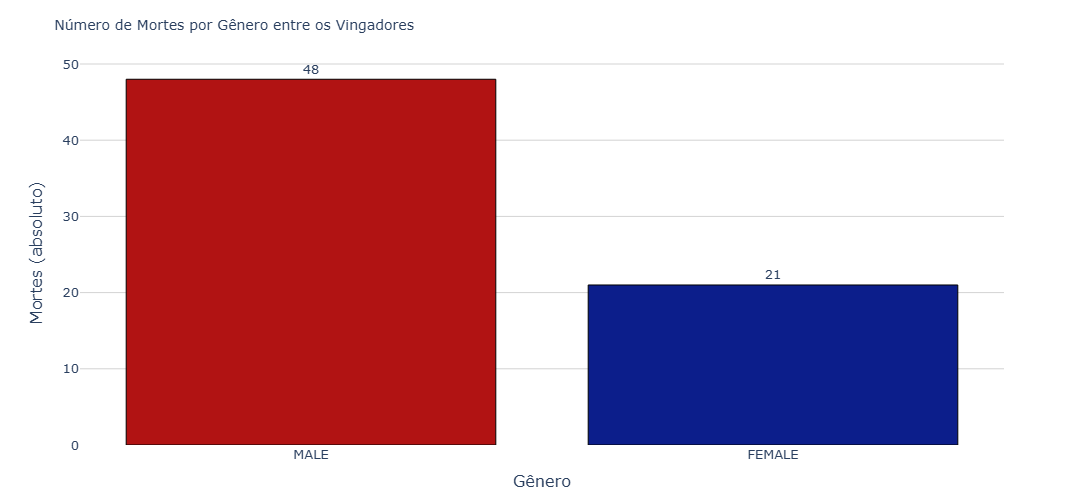

In [25]:
# Filtrar personagens com morte confirmada
df_deaths = df[df['death1'] == 1]

# Contar mortes por g√™nero
death_counts = df_deaths['gender'].value_counts().reset_index()
death_counts.columns = ['gender', 'num_deaths']

# Gr√°fico de barras melhorado
fig1 = px.bar(
    death_counts.sort_values('num_deaths', ascending=False),
    x='gender',
    y='num_deaths',
    color='gender',
    text='num_deaths',
    title='N√∫mero de Mortes por G√™nero entre os Vingadores',
    color_discrete_sequence=avengers_palette
)

# Estilizando o gr√°fico
fig1.update_traces(
    textposition='outside',
    marker=dict(line=dict(color='black', width=1))  # borda nas barras
)

fig1.update_layout(
    xaxis_title='G√™nero',
    yaxis_title='Mortes (absoluto)',
    title_font_size=14,
    font=dict(size=13),
    plot_bgcolor='white',
    paper_bgcolor='white',
    showlegend=False,
    margin=dict(t=60, b=40),
    height=500,
    width=700,
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor='lightgray')  # Grid horizontal leve
)


fig1.show()


# Salvando o gr√°fico como uma imagem PNG
fig1.write_image('C:/Users/Rubeus/Documents/tcc/images/fig_9.png', width=1200, height=700, scale=3)

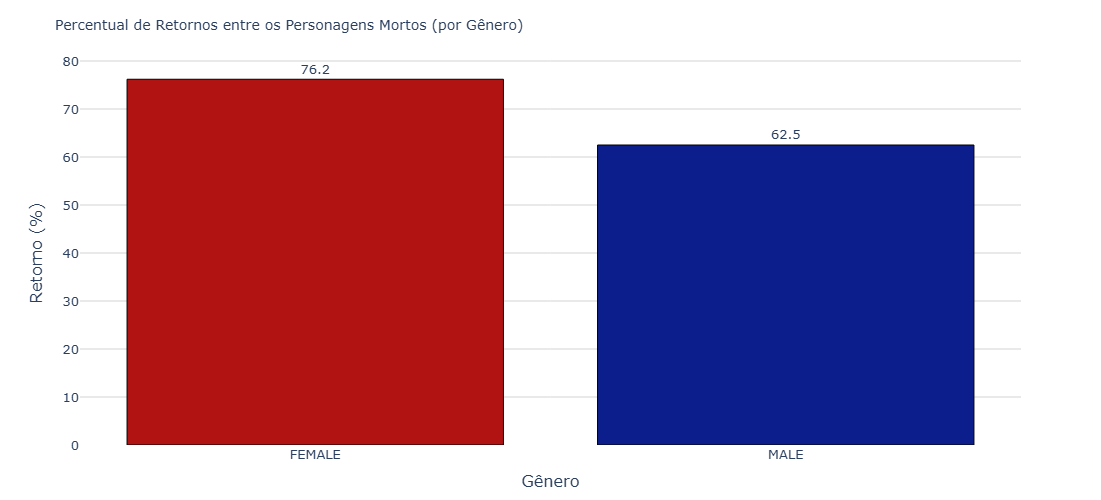

In [26]:
# Agrupar por g√™nero: total de mortos + quantos voltaram
summary = df[df['death1'] == 1].groupby('gender')[['return1']].agg(
    total_deaths=('return1', 'count'),
    total_returns=('return1', 'sum')
).reset_index()

# Calcular percentual de retorno
summary['return_rate'] = (summary['total_returns'] / summary['total_deaths'] * 100).round(1)

# Gr√°fico de barras para retorno
fig2 = px.bar(
    summary.sort_values('return_rate', ascending=False),
    x='gender',
    y='return_rate',
    color='gender',
    text='return_rate',
    title='Percentual de Retornos entre os Personagens Mortos (por G√™nero)',
    color_discrete_sequence=avengers_palette 
)

fig2.update_traces(
    textposition='outside',
    marker=dict(line=dict(color='black', width=1))  # borda nas barras
)

fig2.update_layout(
    xaxis_title='G√™nero',
    yaxis_title='Retorno (%)',
    title_font_size=14,
    font=dict(size=13),
    plot_bgcolor='white',
    paper_bgcolor='white',
    showlegend=False,
    margin=dict(t=60, b=40),
    height=500,
    width=700,
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor='lightgray')  # Grid horizontal leve
)

fig2.show()


# Salvando o gr√°fico como uma imagem PNG
fig2.write_image('C:/Users/Rubeus/Documents/avengers/images/fig_91.png', width=1200, height=700, scale=3)

- Em termos absolutos, personagens do g√™nero masculino morreram mais vezes que os do g√™nero feminino.

- Apesar de as mulheres morrerem menos, elas retornam proporcionalmente mais do que os homens. Essa diferen√ßa pode sugerir uma maior valoriza√ß√£o de personagens femininas mortas na narrativa, resultando em mais ‚Äúressurrei√ß√µes‚Äù.

### 3.9 An√°lise de Mortalidade por Quartil de Apari√ß√µes

In [28]:
# Criar a coluna de quartil
df['appearances_quartile'] = pd.qcut(df['appearances'], q=4, labels=['1¬∫ Quartil', '2¬∫ Quartil', '3¬∫ Quartil', '4¬∫ Quartil'])

# Agrupar por quartil e calcular a m√©dia de mortes
quartil_mortality = df.groupby('appearances_quartile')['death1'].mean().reset_index()
quartil_mortality.columns = ['Quartil de Apari√ß√µes', 'Percentual de Mortes']
quartil_mortality['Percentual de Mortes'] = (quartil_mortality['Percentual de Mortes'] * 100).round(1)

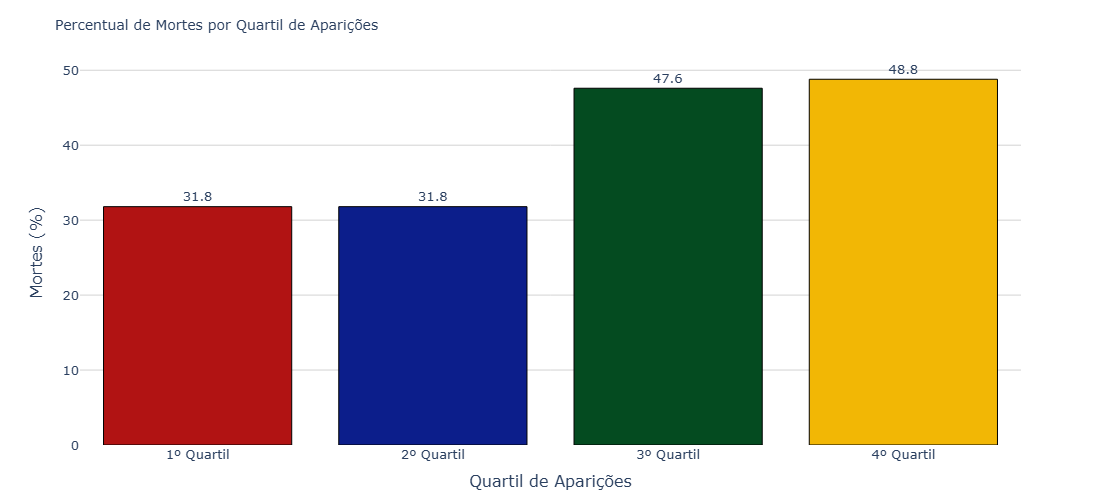

In [29]:
fig = px.bar(
    quartil_mortality,
    x='Quartil de Apari√ß√µes',
    y='Percentual de Mortes',
    text='Percentual de Mortes',
    color='Quartil de Apari√ß√µes',
    color_discrete_sequence=avengers_palette,  
    title='Percentual de Mortes por Quartil de Apari√ß√µes'
)

fig.update_traces(
    textposition='outside',
    marker=dict(line=dict(color='black', width=1))
)

fig.update_layout(
    xaxis_title='Quartil de Apari√ß√µes',
    yaxis_title='Mortes (%)',
    title_font_size=14,
    font=dict(size=13),
    plot_bgcolor='white',
    paper_bgcolor='white',
    showlegend=False,
    margin=dict(t=60, b=40),
    height=500,
    width=700,
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor='lightgray')
)

fig.show()

# Salvando o gr√°fico como uma imagem PNG
fig.write_image('C:/Users/Rubeus/Documents/avengers/images/fig_10.png', width=1200, height=700, scale=3)

- O senso comum poderia sugerir que personagens com maior destaque (mais apari√ß√µes) s√£o ‚Äúprotegidos‚Äù pelas narrativas por serem mais populares e valiosos comercialmente. Mas os dados mostram o oposto.

- A taxa de mortalidade sobe significativamente nos 3¬∫ e 4¬∫ quartis, chegando a quase 49% no grupo dos personagens mais presentes.

- Nos dois primeiros quartis, vemos uma taxa constante de 31,8% de mortes. Isso sugere que personagens menos utilizados tamb√©m s√£o descartados com frequ√™ncia, o que pode indicar: elimina√ß√£o de personagens pouco relevantes, falta de desenvolvimento profundo ou simplifica√ß√£o do universo em momentos de reestrutura√ß√£o editorial.

### 3.10 A m√©dia de apari√ß√µes dos personagens varia de acordo com o g√™nero e com a ocorr√™ncia de morte?

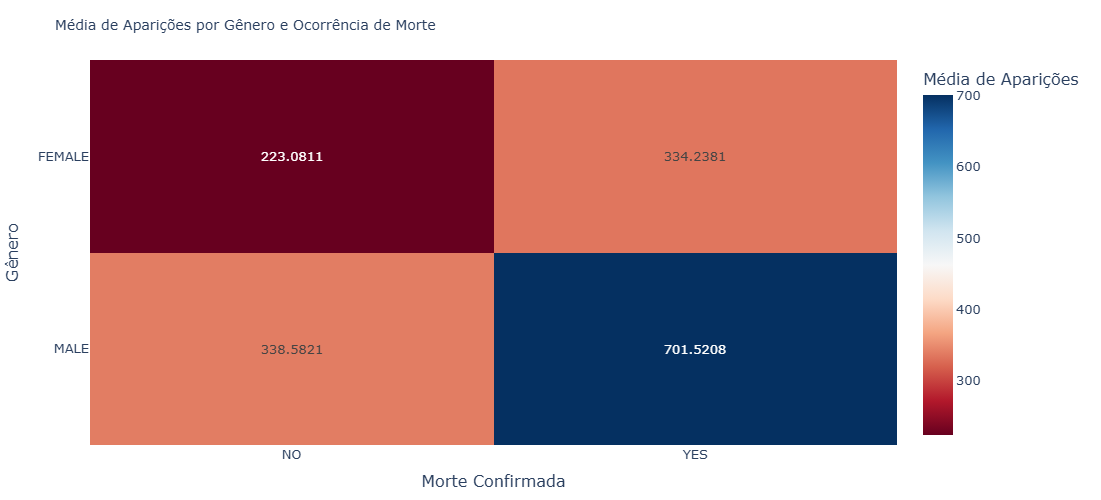

In [30]:
# Garantir que os valores de g√™nero estejam padronizados
df['gender'] = df['gender'].str.upper()

# Filtrar apenas os g√™neros relevantes e valores v√°lidos de death1
df_filtered = df[df['gender'].isin(['FEMALE', 'MALE']) & df['death1'].isin([0, 1])]

# Mapear os valores de death1 para labels leg√≠veis
df_filtered['death_status'] = df_filtered['death1'].map({0: 'NO', 1: 'YES'})

# Calcular a m√©dia de apari√ß√µes por combina√ß√£o de g√™nero e morte
heatmap_data = df_filtered.groupby(['gender', 'death_status'])['appearances'].mean().reset_index()
heatmap_data = heatmap_data.pivot(index='gender', columns='death_status', values='appearances')

# Criar mapa de calor
fig = px.imshow(
    heatmap_data,
    text_auto=True,
    color_continuous_scale='RdBu',
    aspect='auto',
    labels=dict(x="Morte Confirmada (Death1)", y="G√™nero", color="M√©dia de Apari√ß√µes"),
    title="M√©dia de Apari√ß√µes por G√™nero e Ocorr√™ncia de Morte"
)

# Ajustes visuais
fig.update_layout(
    title_font_size=14,
    font=dict(size=13),
    xaxis_title="Morte Confirmada",
    yaxis_title="G√™nero",
    margin=dict(t=60, b=40),
    plot_bgcolor='white',
    paper_bgcolor='white',
    height=500,
    width=700
)

fig.show()

# Salvando o gr√°fico como uma imagem PNG
fig.write_image('C:/Users/Rubeus/Documents/avengers/images/fig_11.png', width=1200, height=700, scale=3)

- A an√°lise sugere que a morte est√° fortemente associada √† relev√¢ncia do personagem na narrativa - especialmente entre homens, que os personagens mortos t√™m mais que o dobro de apari√ß√µes em rela√ß√£o aos vivos.

- Mesmo quando morrem, personagens femininas aparecem menos que personagens masculinos que n√£o morreram.

- Personagens que n√£o morrem s√£o, em geral, menos explorados. Isso pode indicar que alguns personagens "menores", de apoio ou que servem como composi√ß√£o de equipe, n√£o t√™m arcos complexos o suficiente para justificar uma morte narrativa, e por isso aparecem menos tamb√©m.